In [2]:
# Installation des librairies
!pip install rasterio geopandas matplotlib rasterstats numpy matplotlib-scalebar folium

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ---------------------------- ----------- 41.0/58.1 kB 1.9 MB/s eta 0:00:01
     ---------------------------- ----------- 41.0/58.1 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 509.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/25.4 MB 1.3 MB/s eta 0:00:20
   ---------------------------------------- 0.1/25.4 MB 1.3 MB/s eta 0:00:20
   ---------------------------------------- 0.1/25.4 MB 657.6 kB/s eta 0:00:39
   ---------------------------------------- 0.1/25.4 MB 737.3 kB/s eta 0:00:35
   --------------------------------------

In [106]:
 ## Importation des bibliothèques nécessaires
import os  # Permet de gérer les chemins de fichiers et d'effectuer des opérations de gestion de fichiers.
import rasterio  # Bibliothèque principale pour lire, écrire et manipuler des données raster.
import numpy as np  # Bibliothèque pour le calcul scientifique, utile pour manipuler des tableaux de données numériques.
import matplotlib.pyplot as plt  # Fournit des outils pour créer des graphiques et visualiser les données.
from matplotlib.colors import LinearSegmentedColormap  # Permet de créer des palettes de couleurs personnalisées pour la visualisation des données.
from rasterio.mask import mask  # Fonction pour découper des rasters en utilisant des géométries de masquage spécifiques.
from rasterio.warp import calculate_default_transform, reproject, Resampling  # Fournit des outils pour reprojeter les rasters dans un autre système de coordonnées.
from rasterio.enums import Resampling  # Enumération pour définir les méthodes de rééchantillonnage lors des transformations spatiales des rasters.
import geopandas as gpd  # Extension de pandas pour manipuler des données géospatiales vectorielles (shapefiles, GeoDataFrames).
from matplotlib_scalebar.scalebar import ScaleBar  # Ajoute une barre d'échelle sur les graphiques pour les cartes.
import pandas as pd  # Fournit des outils pour manipuler et analyser des données tabulaires, particulièrement dans des DataFrames.
import rasterstats  # Fournit des fonctions pour calculer des statistiques zonales sur les rasters.
from rasterstats import zonal_stats  # Fonction pour calculer des statistiques de pixels dans des zones définies par des géométries vectorielles.



In [107]:
# Définition de notre work directory
directory='C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python'
os.chdir(directory)
pop_raster_file = "BFA_population_v1_1_gridded.tif"
pop_raster_path = f"{directory}\\{pop_raster_file}"

Taille du pixel : 92.76666629262293 m


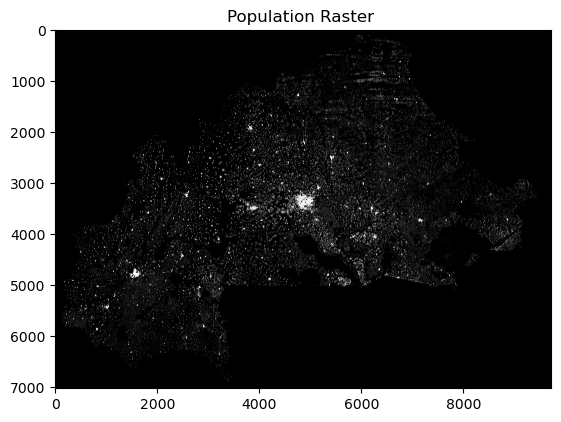

In [108]:
#1. Importer et visualiser les données sur la population (verifier la taille des pixels=100m)
with rasterio.open(pop_raster_path) as pop_raster:
    pop_data = pop_raster.read(1)  # Lire la première bande de données
    pixel_size = pop_raster.res[0]* 111320  # Obtenir la taille des pixels en mètres 
    print("Taille du pixel :", pixel_size, "m")  # Vérifier la taille du pixel (devrait être 100m)
    
    # Afficher le raster de la population
    plt.imshow(pop_data, cmap="gray") #pour voir l'image
    plt.title("Population Raster ")
    plt.show()


In [109]:
import rasterio

with rasterio.open(population_raster) as src:
    array = src.read(1)
    print(f"Valeurs maximales et minimales du raster : {np.nanmax(array)}, {np.nanmin(array)}")


Valeurs maximales et minimales du raster : 74.44583892822266, -3.3999999521443642e+38


In [110]:
# Charger le shapefile des régions
regions = gpd.read_file("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/bfa_adm_igb_20200323_shp/bfa_admbnda_adm1_igb_20200323.shp")

# Chemin vers le fichier raster de population
population_raster = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/BFA_population_v1_1_gridded.tif"

# Obtenir les valeurs de pixels par zone sans utiliser 'stats' pour récupérer toutes les valeurs de pixels
zonal_stats = zonal_stats(
    regions, population_raster, stats=None, nodata=-999, raster_out=True, all_touched=True
)

# Calculer la moyenne arithmétique pour chaque zone et ajouter les résultats
arith_mean_values = []
for stat in zonal_stats:
    # Récupérer les valeurs de pixels (si elles existent)
    pixel_values = stat['mini_raster_array']
    
    # Appliquer le masque pour exclure les valeurs manquantes ou négatives
    positive_values = pixel_values[(pixel_values > 0) & (~np.isnan(pixel_values))]
    
    # Calculer la somme si des valeurs positives existent
    arith_mean = np.sum(positive_values) if len(positive_values) > 0 else np.nan
    arith_mean_values.append(arith_mean)

# Ajouter les résultats au GeoDataFrame
regions['Population par region'] = arith_mean_values

# Afficher les résultats
print(regions[['ADM1_FR', 'Population par region']]) 

# Exportonns cela en fichier csv
regions[['ADM1_FR', 'Population par region']].to_csv("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/Population_par_region.csv", index=False)


C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\hp\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in red

              ADM1_FR  Population par region
0   Boucle du Mouhoun            1902596.375
1            Cascades             812796.500
2              Centre            3031614.000
3          Centre-Est            1582037.375
4         Centre-Nord            1876564.875
5        Centre-Ouest            1661888.125
6          Centre-Sud             790283.375
7                 Est            1944037.125
8       Hauts-Bassins            2240776.750
9                Nord            1723541.125
10    Plateau-Central             980891.250
11              Sahel            1099090.625
12          Sud-Ouest             875794.750


In [63]:
print(regions.head)

<bound method NDFrame.head of     Shape_Leng  Shape_Area            ADM1_FR ADM1_PCODE ADM1_REF ADM1ALT1FR  \
0    12.979104    2.866733  Boucle du Mouhoun       BF46     None       None   
1     9.431868    1.509470           Cascades       BF47     None       None   
2     3.287168    0.248302             Centre       BF13     None       None   
3     8.425414    1.201324         Centre-Est       BF48     None       None   
4     7.905622    1.646603        Centre-Nord       BF49     None       None   
5    10.232425    1.800569       Centre-Ouest       BF50     None       None   
6     7.087421    0.960354         Centre-Sud       BF51     None       None   
7    14.563574    3.958924                Est       BF52     None       None   
8    10.947066    2.098539      Hauts-Bassins       BF53     None       None   
9     7.099446    1.376225               Nord       BF54     None       None   
10    7.360558    0.714459    Plateau-Central       BF55     None       None   
11   11.52

In [65]:
import rasterio

# Lire le raster pour inspecter les valeurs
with rasterio.open(population_raster) as src:
    print(src.read(1))  # Affiche la première bande du raster


[[-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 ...
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]
 [-3.4e+38 -3.4e+38 -3.4e+38 ... -3.4e+38 -3.4e+38 -3.4e+38]]


In [111]:
# Vérification
# Calculer la taille totale de la population
total_population = np.nansum(arith_mean_values) #qrith_mean_value fait des sommes deh

# Afficher les résultats
print(f" Le Burkina Faso compte: {total_population:.3f} habitants")

 Le Burkina Faso compte: 20521912.000 habitants


In [112]:
#3. 
# Définir la nouvelle résolution (5 km)
new_resolution = 5000  # en mètres

# Ouvrir le fichier raster d'origine et redimensionner
with rasterio.open(population_raster) as src:
    # Calculer le facteur de mise à l'échelle
    scale_factor = new_resolution / (src.res[0]*111320)  # Utiliser la résolution du fichier source

    # Lire les données avec la nouvelle forme redimensionnée
    pop_5km_data = src.read(
        out_shape=(src.count, int(src.height / scale_factor), int(src.width / scale_factor)),
        resampling=Resampling.average
    )[0]  # Utiliser la première bande

    # Mettre à jour l'affine transform pour refléter la nouvelle résolution
    new_transform = src.transform * src.transform.scale(
        (src.width / pop_5km_data.shape[1]),
        (src.height / pop_5km_data.shape[0])
    )

# Calculer la taille des pixels à partir de new_transform
pixel_width = (new_transform.a ) * 111320# Largeur du pixel en unités de la projection
pixel_height = (-new_transform.e )*111320 # Hauteur du pixel (on prend la valeur absolue car l'origine est souvent en haut)

print("Taille du pixel (largeur sur hauteur) :", pixel_width, "m x", pixel_height, "m")



Taille du pixel (largeur sur hauteur) : 5010.430720538223 m x 5008.68638999046 m


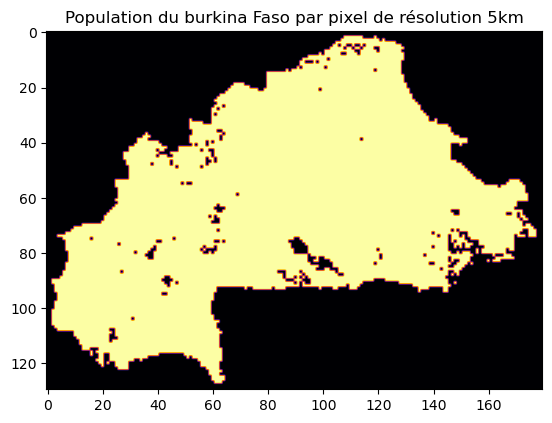

In [113]:
# 4 : Visualisation du raster agrégé

plt.imshow(pop_5km_data, cmap="inferno")
plt.title("Population du burkina Faso par pixel de résolution 5km")
plt.show()




# Chemin de sortie pour le raster enregistré
chemin_raster_pop = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/pop_5km_data.tiff"

# Enregistrement du raster
with rasterio.open(chemin_raster_pop, 'w', driver='GTiff',
                   height=pop_5km_data.shape[0], 
                   width=pop_5km_data.shape[1],
                   count=1, dtype=pop_5km_data.dtype,
                   crs='EPSG:4326',  
                   transform=profile['transform']) as dst:  
    dst.write(pop_5km_data.astype(np.float32), 1)  


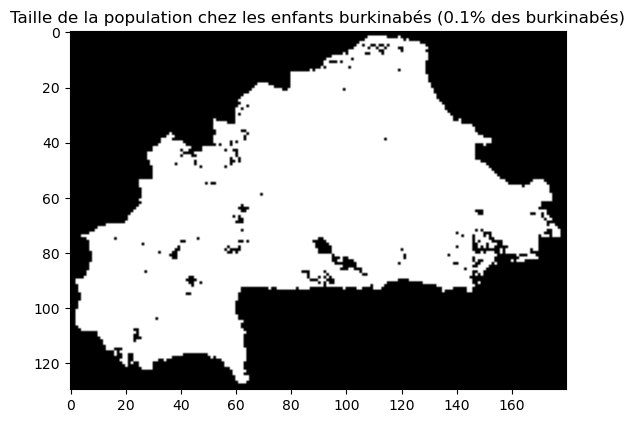

Raster pour la population d'enfants burkinabés créé et enregistré avec succès.


In [114]:
# 5 : Création d'un nouveau raster en multipliant le raster pop_5km_data par 0,1%

taux_enfants_burkinabe=0.001 # Les enfants représentent 0.1% de la population burkinabé
enfants_bfa_raster = pop_5km_data * taux_enfants_burkinabe  # Réduire les valeurs de 0,1%
plt.imshow(enfants_bfa_raster, cmap="gray")
plt.title("Taille de la population chez les enfants burkinabés (0.1% des burkinabés)")
plt.show()

# Enregistrement du raster pour enfants_bfa_raster
cheminraster_enfants_bfa = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/enfants_bfa_raster.tiff"  
# Profil pour l'enregistrement
with rasterio.open("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/pop_5km_data.tiff"
) as src:
    profile = src.profile  # Garder le profil pour l'enregistrement

# Enregistrement du raster d'enfants
with rasterio.open(cheminraster_enfants_bfa, 'w', driver='GTiff',
                   height=enfants_bfa_raster.shape[0], 
                   width=enfants_bfa_raster.shape[1],
                   count=1, dtype=enfants_bfa_raster.dtype,
                   crs=profile['crs'], transform=profile['transform']) as dst:
    dst.write(enfants_bfa_raster.astype(np.float32), 1)

print("Raster pour la population d'enfants burkinabés créé et enregistré avec succès.")


In [115]:
################ R A P P E L  D U  T P 4

In [116]:

# Définition des chemins d'accès aux données
dossier_donnees_burkinafaso = r"C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/Abson-dev Statistique-Exploratoire-Spatiale main TP2-data_Malaria_Burkina/"

# Création d'un dictionnaire avec les chemins vers les fichiers TIFF de prévalence du paludisme
# pour chaque année de 2000 à 2022
cartes_malaria = {
    f'carte_malaria_{annee}': f"{dossier_donnees_burkinafaso}202406_Global_Pf_Parasite_Rate_BFA_{annee}.tiff" 
    for annee in range(2000, 2023)
}

# Chemins vers les shapefiles des différentes divisions administratives
limites_administratives = {}
for niveau in range(4):
    limites_administratives[f'niveau_{niveau}'] = (
        f"C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/bfa_adm_igb_20200323_shp/bfa_admbnda_adm{niveau}_igb_20200323.shp"
    )


In [117]:
#### S U I T E  D U  T P 4  (1/2)

In [118]:
# Lecture et traitement des données raster
donnees_prevalence = []  # Liste pour stocker les données de prévalence du malaria

# Lecture de chaque carte de prévalence
for chemin_carte in cartes_malaria.values():  # Itération sur chaque chemin de carte dans le dictionnaire
    with rasterio.open(chemin_carte) as carte:  # Ouverture du fichier raster
        # Lecture de la bande principale de chaque carte
        donnees_prevalence.append(carte.read(1))  # Ajout des données de la première bande à la liste

# Création d'un tableau pour les calculs : (nombre_annees, hauteur, largeur)
tableau = np.stack(donnees_prevalence, axis=0)  # Empilement des données dans un tableau 3D

# Calcul des statistiques 
#masque_valeurs_manquantes = np.isnan(tableau)  # Création d'un masque pour les valeurs manquantes
moyenne_historique = np.nanmean(tableau, axis=0)  # Calcul de la moyenne tout en ignorant les NaN
ecart_type_historique = np.nanstd(tableau, axis=0)  # Calcul de l'écart-type biaisé tout en ignorant les NaN
#ecart_type_historique = np.nanstd(tableau, axis=0, ddof=1)  # Calcul de l'écart-type non biaisé  
#####Le paramètre ddof dans les fonctions NumPy, comme np.std ou np.nanstd, signifie "Delta Degrees of Freedom" (degrés de liberté). Il influence le dénominateur dans le calcul de l'écart-type.

# Sauvegarde des statistiques calculées
# Utilisation des métadonnées de la première carte comme référence
with rasterio.open(next(iter(cartes_malaria.values()))) as carte_reference:  # Ouverture d'une des cartes pour obtenir les métadonnées
    parametres_carte = carte_reference.profile  # Récupération du profil (métadonnées) de la carte
    parametres_carte.update(dtype=rasterio.float32)  # Mise à jour du type de données pour la sortie

# Sauvegarde de la carte des moyennes
with rasterio.open("moyenne_historique_malaria_bfaso.tif", "w", **parametres_carte) as carte_sortie:  # Ouverture d'un fichier pour écrire la carte des moyennes
    carte_sortie.write(moyenne_historique.astype(rasterio.float32), 1)  # Écriture de la moyenne dans le fichier

# Sauvegarde de la carte des écarts-types
with rasterio.open("ecart_type_malaria_bfaso.tif", "w", **parametres_carte) as carte_sortie:  # Ouverture d'un fichier pour écrire la carte des écarts-types
    carte_sortie.write(ecart_type_historique.astype(rasterio.float32), 1)  # Écriture de l'écart-type dans le fichier

print("Cartes statistiques générées avec succès.")  # Message de confirmation de la génération des cartes


Cartes statistiques générées avec succès.


In [119]:
#### S U I T E  D U  T P 4  (2/2) FIN

Raster enregistré : carte_risque_2020.tiff


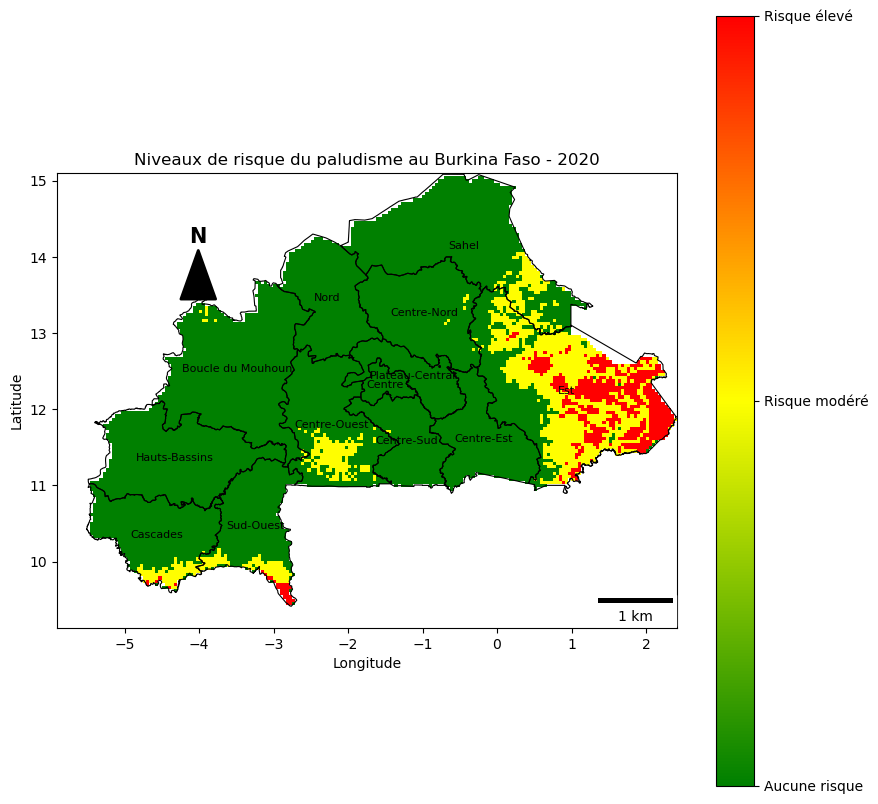

Raster enregistré : carte_risque_2021.tiff


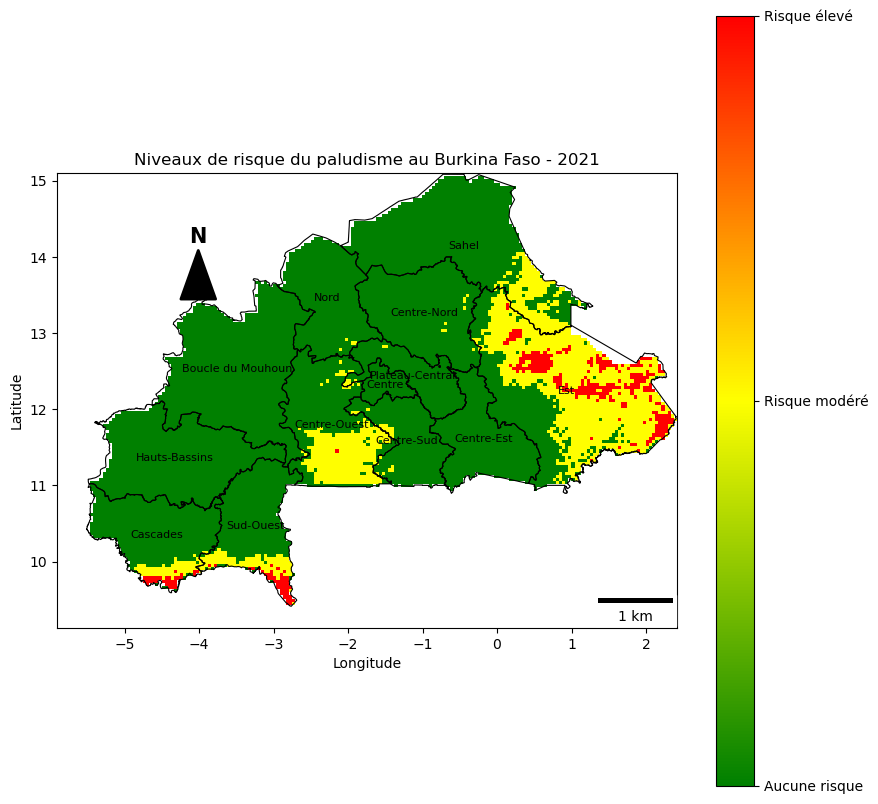

Raster enregistré : carte_risque_2022.tiff


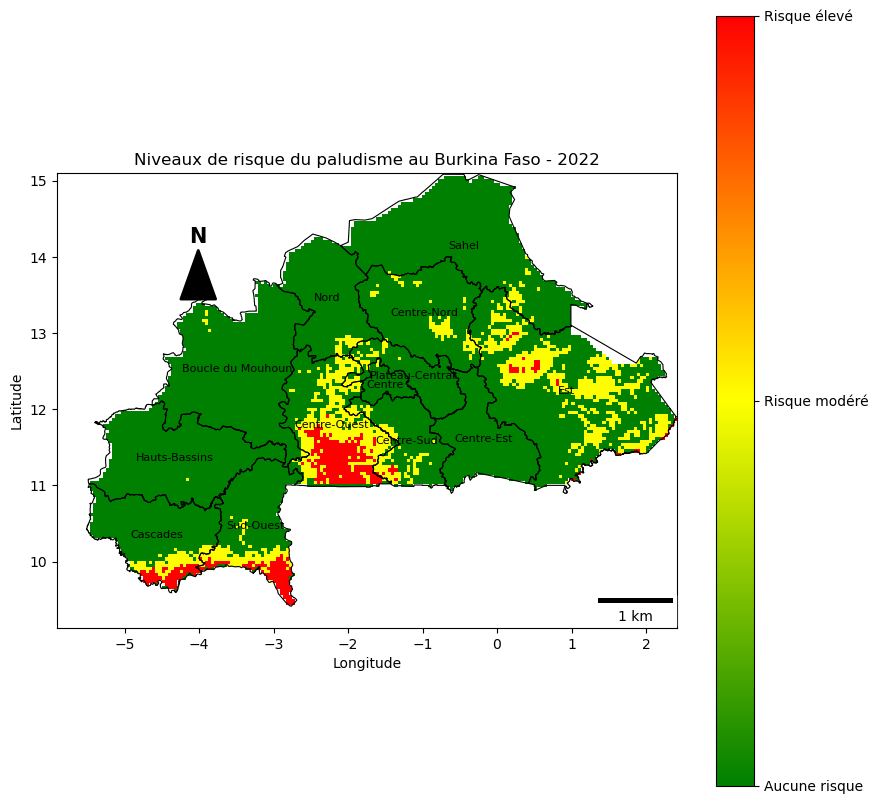

In [120]:
# Analyse des années récentes (2020-2022)
# Création d'un dictionnaire 'cartes_recentes' contenant les chemins vers les fichiers TIFF pour les années 2020, 2021 et 2022
cartes_recentes = {
    2020: cartes_malaria['carte_malaria_2020'],
    2021: cartes_malaria['carte_malaria_2021'],
    2022: cartes_malaria['carte_malaria_2022']
}

# Chargement des limites administratives pour le pays
limites_pays = gpd.read_file(limites_administratives['niveau_0'])
geometrie_bfaso = limites_pays.geometry.values

# Chargement des limites administratives pour les régions
limites_regions = gpd.read_file(limites_administratives['niveau_1'])

# Définition d'une palette de couleurs pour la classification des niveaux de risque
palette_risque = LinearSegmentedColormap.from_list("niveaux_risque", ["green", "yellow", "red"])

# Fonction pour ajouter une rose des vents sur la carte
def ajouter_rose_des_vents(ax, x, y, taille=1, texte="N", taille_texte=12):
    """Ajoute une rose des vents sur la carte."""
    # Flèche principale (Nord)
    ax.annotate('', xy=(x, y + taille), xytext=(x, y),
                arrowprops=dict(facecolor='black', edgecolor='black',
                                linewidth=2, headwidth=25, headlength=35, width=5))
    # Ligne du Sud
    ax.annotate('', xy=(x, y), xytext=(x, y - taille * 0.2),
                arrowprops=dict(facecolor='black', edgecolor='black',
                                linewidth=1, headwidth=0, headlength=0, width=1))
    # Texte "N" indiquant le Nord
    ax.text(x, y + taille + 0.05, texte, ha='center', va='bottom',
            fontsize=taille_texte, fontweight='bold')

# Analyse et visualisation pour chaque année récente
for annee, chemin_carte in cartes_recentes.items():
    with rasterio.open(chemin_carte) as carte:
        # Extraction des données pour le Burkina Faso uniquement
        try:
            donnees_annee, transformation = mask(carte, geometrie_bfaso, crop=True, nodata=np.nan)
            donnees_annee = donnees_annee[0]
        except ValueError as e:
            print(f"Erreur lors du traitement de l'année {annee}: {e}")
            continue

        # Calcul de la moyenne historique et de l'écart type
        moyenne_historique = np.nanmean(donnees_annee)
        ecart_type_historique = np.nanstd(donnees_annee)

        # Classification des zones selon le niveau de risque
        # Zones Normales
        zone_normale = np.where(donnees_annee < (moyenne_historique + ecart_type_historique), 1, 0)  # 1 pour normale, 0 pour autre chose
        # Zones d'Alerte
        zone_alerte = np.where(
            (donnees_annee >= moyenne_historique + ecart_type_historique) & 
            (donnees_annee < moyenne_historique + 2 * ecart_type_historique), 1, 0)  # 1 pour alerte, 0 pour autre chose
        # Zones Critiques
        zone_critique = np.where(donnees_annee >= (moyenne_historique + 2 * ecart_type_historique), 1, 0)  # 1 pour critique, 0 pour autre chose

        # Création de la carte de classification finale
        carte_risque = np.full_like(donnees_annee, np.nan)  # Initialisation d'un tableau avec des valeurs NaN
        carte_risque[zone_normale == 1] = 1  # Affectation des zones normales
        carte_risque[zone_alerte == 1] = 2  # Affectation des zones d'alerte
        carte_risque[zone_critique == 1] = 3  # Affectation des zones critiques

        # Définition de l'étendue géographique pour l'affichage
        etendue_carte = (
            transformation[2],  # Coordonnée x min
            transformation[2] + transformation[0] * carte_risque.shape[1],  # Coordonnée x max
            transformation[5] + transformation[4] * carte_risque.shape[0],  # Coordonnée y max
            transformation[5]  # Coordonnée y min
        )

        # Création de la visualisation
        fig, ax = plt.subplots(figsize=(10, 10))
        plt.title(f"Niveaux de risque du paludisme au Burkina Faso - {annee}")
        
        # Affichage de la carte de risque
        carte = ax.imshow(carte_risque, cmap=palette_risque, extent=etendue_carte, interpolation='nearest')

        # Légende
        barre_couleurs = plt.colorbar(carte, ticks=[1, 2, 3], ax=ax)
        barre_couleurs.ax.set_yticklabels(["Aucune risque", "Risque modéré", "Risque élevé"])

        # Ajout des limites régionales
        limites_regions.boundary.plot(ax=ax, edgecolor="black", linewidth=0.8)

        # Étiquetage des régions
        for idx, region in limites_regions.iterrows():
            centre = region.geometry.centroid
            ax.text(centre.x, centre.y, region['ADM1_FR'], fontsize=8, ha='center', va='center')

        # Ajout des éléments cartographiques
        longitude_min = limites_pays.total_bounds[0]
        latitude_max = limites_pays.total_bounds[3]
        
        # Ajout de la rose des vents
        ajouter_rose_des_vents(ax, longitude_min + 1.5, latitude_max - 1.5, taille=0.5, taille_texte=15)
        
        # Barre d'échelle
        barre_echelle = ScaleBar(1, units="km", location="lower right")
        ax.add_artist(barre_echelle)

        # Labels des axes
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")

        # Enregistrement du raster pour chaque année
        nom_fichier = f"carte_risque_{annee}.tiff"
        with rasterio.open(chemin_carte) as carte_source:  
            meta = carte_source.meta  

        with rasterio.open(nom_fichier, 'w', driver='GTiff',
                           height=carte_risque.shape[0], width=carte_risque.shape[1],
                           count=1, dtype=carte_risque.dtype,
                           crs=meta['crs'], transform=transformation) as dst:
            dst.write(carte_risque, 1)

        print(f"Raster enregistré : {nom_fichier}")

        plt.show()  # Affichage de la carte



In [121]:
############################ R  E  P  R  I  S  E        D  U       T  P  5

In [122]:
# Créer trois nouveaux raster binarisés à partir du raster sur le taux de malaria en 2020
Chemin_rasters = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/carte_risque_2022.tiff"
# Lecture du raster d'origine
with rasterio.open(Chemin_rasters) as src:
    # Lecture des données
    donnees = src.read(1)  # Lecture de la première bande
    profile = src.profile   # Récupération du profil pour conserver les métadonnées

# Création des rasters binaires
raster_binaire_1 = np.where(donnees == 1, 1, 0)  # Raster binaire pour la valeur 1
raster_binaire_2 = np.where(donnees == 2, 1, 0)  # Raster binaire pour la valeur 2
raster_binaire_3 = np.where(donnees == 3, 1, 0)  # Raster binaire pour la valeur 3

# Chemins pour sauvegarder les nouveaux rasters
chemin_raster_binaire_1 = 'C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_binaire_1.tif'
chemin_raster_binaire_2 = 'C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_binaire_2.tif'
chemin_raster_binaire_3 = 'C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_binaire_3.tif'

# Fonction pour enregistrer un raster
def enregistrer_raster(nom_fichier, donnees, profile):
    profile['dtype'] = 'uint8'  # Définit le type de données sur uint8
    with rasterio.open(nom_fichier, 'w', **profile) as dst:
        dst.write(donnees, 1)  # Écriture des données dans la première bande

# Enregistrement des rasters binaires
enregistrer_raster(chemin_raster_binaire_1, raster_binaire_1.astype(np.uint8), profile)
enregistrer_raster(chemin_raster_binaire_2, raster_binaire_2.astype(np.uint8), profile)
enregistrer_raster(chemin_raster_binaire_3, raster_binaire_3.astype(np.uint8), profile)

print("Rasters binaires créés avec succès.")



Rasters binaires créés avec succès.


In [123]:
#VERIFICATION DU CONTENU DES NOUVEAUX RASTERS
print(np.unique(raster_binaire_2))
print(raster_binaire_2)
# Obtenir les valeurs uniques
valeurs_uniques = np.unique(donnees[~np.isnan(donnees)])

print("Valeurs uniques dans le raster :", valeurs_uniques)

[0 1]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Valeurs uniques dans le raster : [1. 2. 3.]


In [124]:
# 7 : Multiplier chaque raster binarisé par le raster de population

# Fonction pour enregistrer le raster
def enregistrer_raster(chemin, donnees, profile):
    with rasterio.open(chemin, 'w', **profile) as dst:
        dst.write(donnees, 1)

# Charger le raster de population
cheminraster_enfants_bfa = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/enfants_bfa_raster.tiff"  
 # Remplacez par le chemin de votre fichier
with rasterio.open(cheminraster_enfants_bfa) as src:
    pop_data_enfant = src.read(1)  # Lire la première bande
    profile = src.profile  # Garder le profil pour l'enregistrement

# Multiplier chaque raster binaire par le raster de population
raster_resultat_1 = raster_binaire_1.astype(np.uint8) * pop_data_enfant
raster_resultat_2 = raster_binaire_2.astype(np.uint8) * pop_data_enfant
raster_resultat_3 = raster_binaire_3.astype(np.uint8) * pop_data_enfant

# Enregistrement des rasters résultants
enregistrer_raster("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_resultat_1.tif", raster_resultat_1.astype(np.uint32), profile)
enregistrer_raster("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_resultat_2.tif", raster_resultat_2.astype(np.uint32), profile)
enregistrer_raster("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_resultat_3.tif", raster_resultat_3.astype(np.uint32), profile)

print("Rasters multipliés par le raster de population créés avec succès.")


ValueError: operands could not be broadcast together with shapes (136,190) (130,180) 

In [92]:
# Fonction pour reprojeter et recadrer un raster à une étendue de référence
def align_raster_to_extent(raster_path, ref_extent, ref_transform, ref_width, ref_height):
    with rasterio.open(raster_path) as src:
        # Nouveau profil avec l'étendue et les dimensions de référence
        new_profile = src.profile
        new_profile.update({
            'height': ref_height,
            'width': ref_width,
            'transform': ref_transform
        })
        
        # Raster aligné
        aligned_data = np.zeros((ref_height, ref_width), dtype=np.uint8)
        
        # Reprojection et découpage du raster
        reproject(
            source=rasterio.band(src, 1),
            destination=aligned_data,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=ref_transform,
            dst_crs=src.crs,
            resampling=Resampling.nearest
        )
        
    return aligned_data

import rasterio

# Ouvrir le raster de référence pour définir l'étendue
with rasterio.open(cheminraster_enfants_bfa) as ref_src:
    ref_transform = ref_src.transform
    ref_width = ref_src.width
    ref_height = ref_src.height
    ref_extent = ref_src.bounds

# Afficher les informations de référence
print("Transformation:", ref_transform)
print("Largeur:", ref_width)
print("Hauteur:", ref_height)
print("Étendue:", ref_extent)

# Aligner chaque raster sur l'étendue de référence
raster_resultat_1_aligned = align_raster_to_extent("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_binaire_1.tif", ref_extent, ref_transform, ref_width, ref_height)
raster_resultat_2_aligned = align_raster_to_extent("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_binaire_2.tif", ref_extent, ref_transform, ref_width, ref_height)
raster_resultat_3_aligned = align_raster_to_extent("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_binaire_3.tif", ref_extent, ref_transform, ref_width, ref_height)
#pop_data_enfant_aligned = align_raster_to_extent("C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/enfants_bfa_raster.tiff", ref_extent, ref_transform, ref_width, ref_height)

# Si nécessaire, sauvegarder les rasters alignés
# Exemple pour raster_resultat_1
with rasterio.open("raster_resultat_1_aligned.tif", "w", **ref_src.profile) as dst:
    dst.write(raster_resultat_1_aligned, 1)


Transformation: | 0.04, 0.00,-5.50|
| 0.00,-0.04, 15.10|
| 0.00, 0.00, 1.00|
Largeur: 180
Hauteur: 130
Étendue: BoundingBox(left=-5.5, bottom=9.683489634215473, right=2.0, top=15.098079548291636)


RasterioIOError: Dataset is closed: C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/enfants_bfa_raster.tiff

In [86]:
with rasterio.open(cheminraster_enfants_bfa) as pop_raster:
    pop_enf = pop_raster.read(1)  # Lire la première bande de données
    pixel_size = pop_raster.res[0]* 111320  # Obtenir la taille des pixels en mètres 
    print("Taille du pixel :", pixel_size, "m")  # Vérifier la taille du pixel (devrait être 100m)
    

Taille du pixel : 4638.333333333333 m


In [32]:
import rasterio

# Chemins des rasters (ajustez selon votre structure de dossiers)
chemin_raster_binaire_1 = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_resultat_1.tiff"
chemin_raster_binaire_2 = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_resultat_2.tiff"
chemin_raster_binaire_3 = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_resultat_3.tiff"
chemin_raster_population = "C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/enfants_bfa_raster.tiff"

# Fonction pour obtenir la taille des pixels d'un raster
def get_raster_shape(chemin):
    with rasterio.open(chemin) as src:
        return src.shape

# Obtenir la taille des pixels des rasters
shape_binaire_1 = get_raster_shape(chemin_raster_binaire_1)
shape_binaire_2 = get_raster_shape(chemin_raster_binaire_2)
shape_binaire_3 = get_raster_shape(chemin_raster_binaire_3)
shape_population = get_raster_shape(chemin_raster_population)

shape_binaire_1, shape_binaire_2, shape_binaire_3, shape_population


RasterioIOError: C:/Users/hp/Desktop/AwaDIAW_ISE-CL/Semestre1/Informatique_Statistique/Statistique_exploratoire/TP5_6_Python/raster_resultat_1.tiff: No such file or directory

In [ ]:
# Étape 8 : Calcul et export des cas de malaria par niveau administratif
affected_by_admin = []
for idx, admin in admin_shapes.iterrows():
    affected_counts = []
    for bin_pop in binarized_pop_rasters:
        masked_data, _ = rasterio.mask.mask(src, [admin["geometry"]], crop=True)  # Appliquer un masque
        affected_counts.append(masked_data.sum())  # Calculer le nombre de personnes affectées
    affected_by_admin.append({"admin_id": admin["id"], "affected_population": affected_counts})  # Stocker les résultats

affected_df = pd.DataFrame(affected_by_admin)  # Convertir en DataFrame
affected_df.to_csv("affected_population_by_admin.csv", index=False)  # Exporter en CSV

In [ ]:
# Étape 9 : Calculer le taux de malaria par niveau administratif
affected_df["malaria_rate"] = affected_df["affected_population"] / population_df["population"]  # Calculer le taux
affected_df.to_csv("malaria_rate_by_admin.csv", index=False)  # Exporter le taux
